# Web Scraping Research articles on Alzheimer's Disease from Pubmed

PubMed is online literature Database for biomedical literature from various scientific journals. It is a service provided by the National Library of Medicine (NLM) at the U.S. National Institutes of Health (NIH).

PubMed is a valuable resource for researchers, healthcare professionals, and anyone interested in exploring the latest developments in medical research. It allows users to search for and access a wide range of peer-reviewed publications, including research papers, clinical trials, and reviews, covering various areas of biomedicine, such as genetics, immunology, pharmacology, and many others.

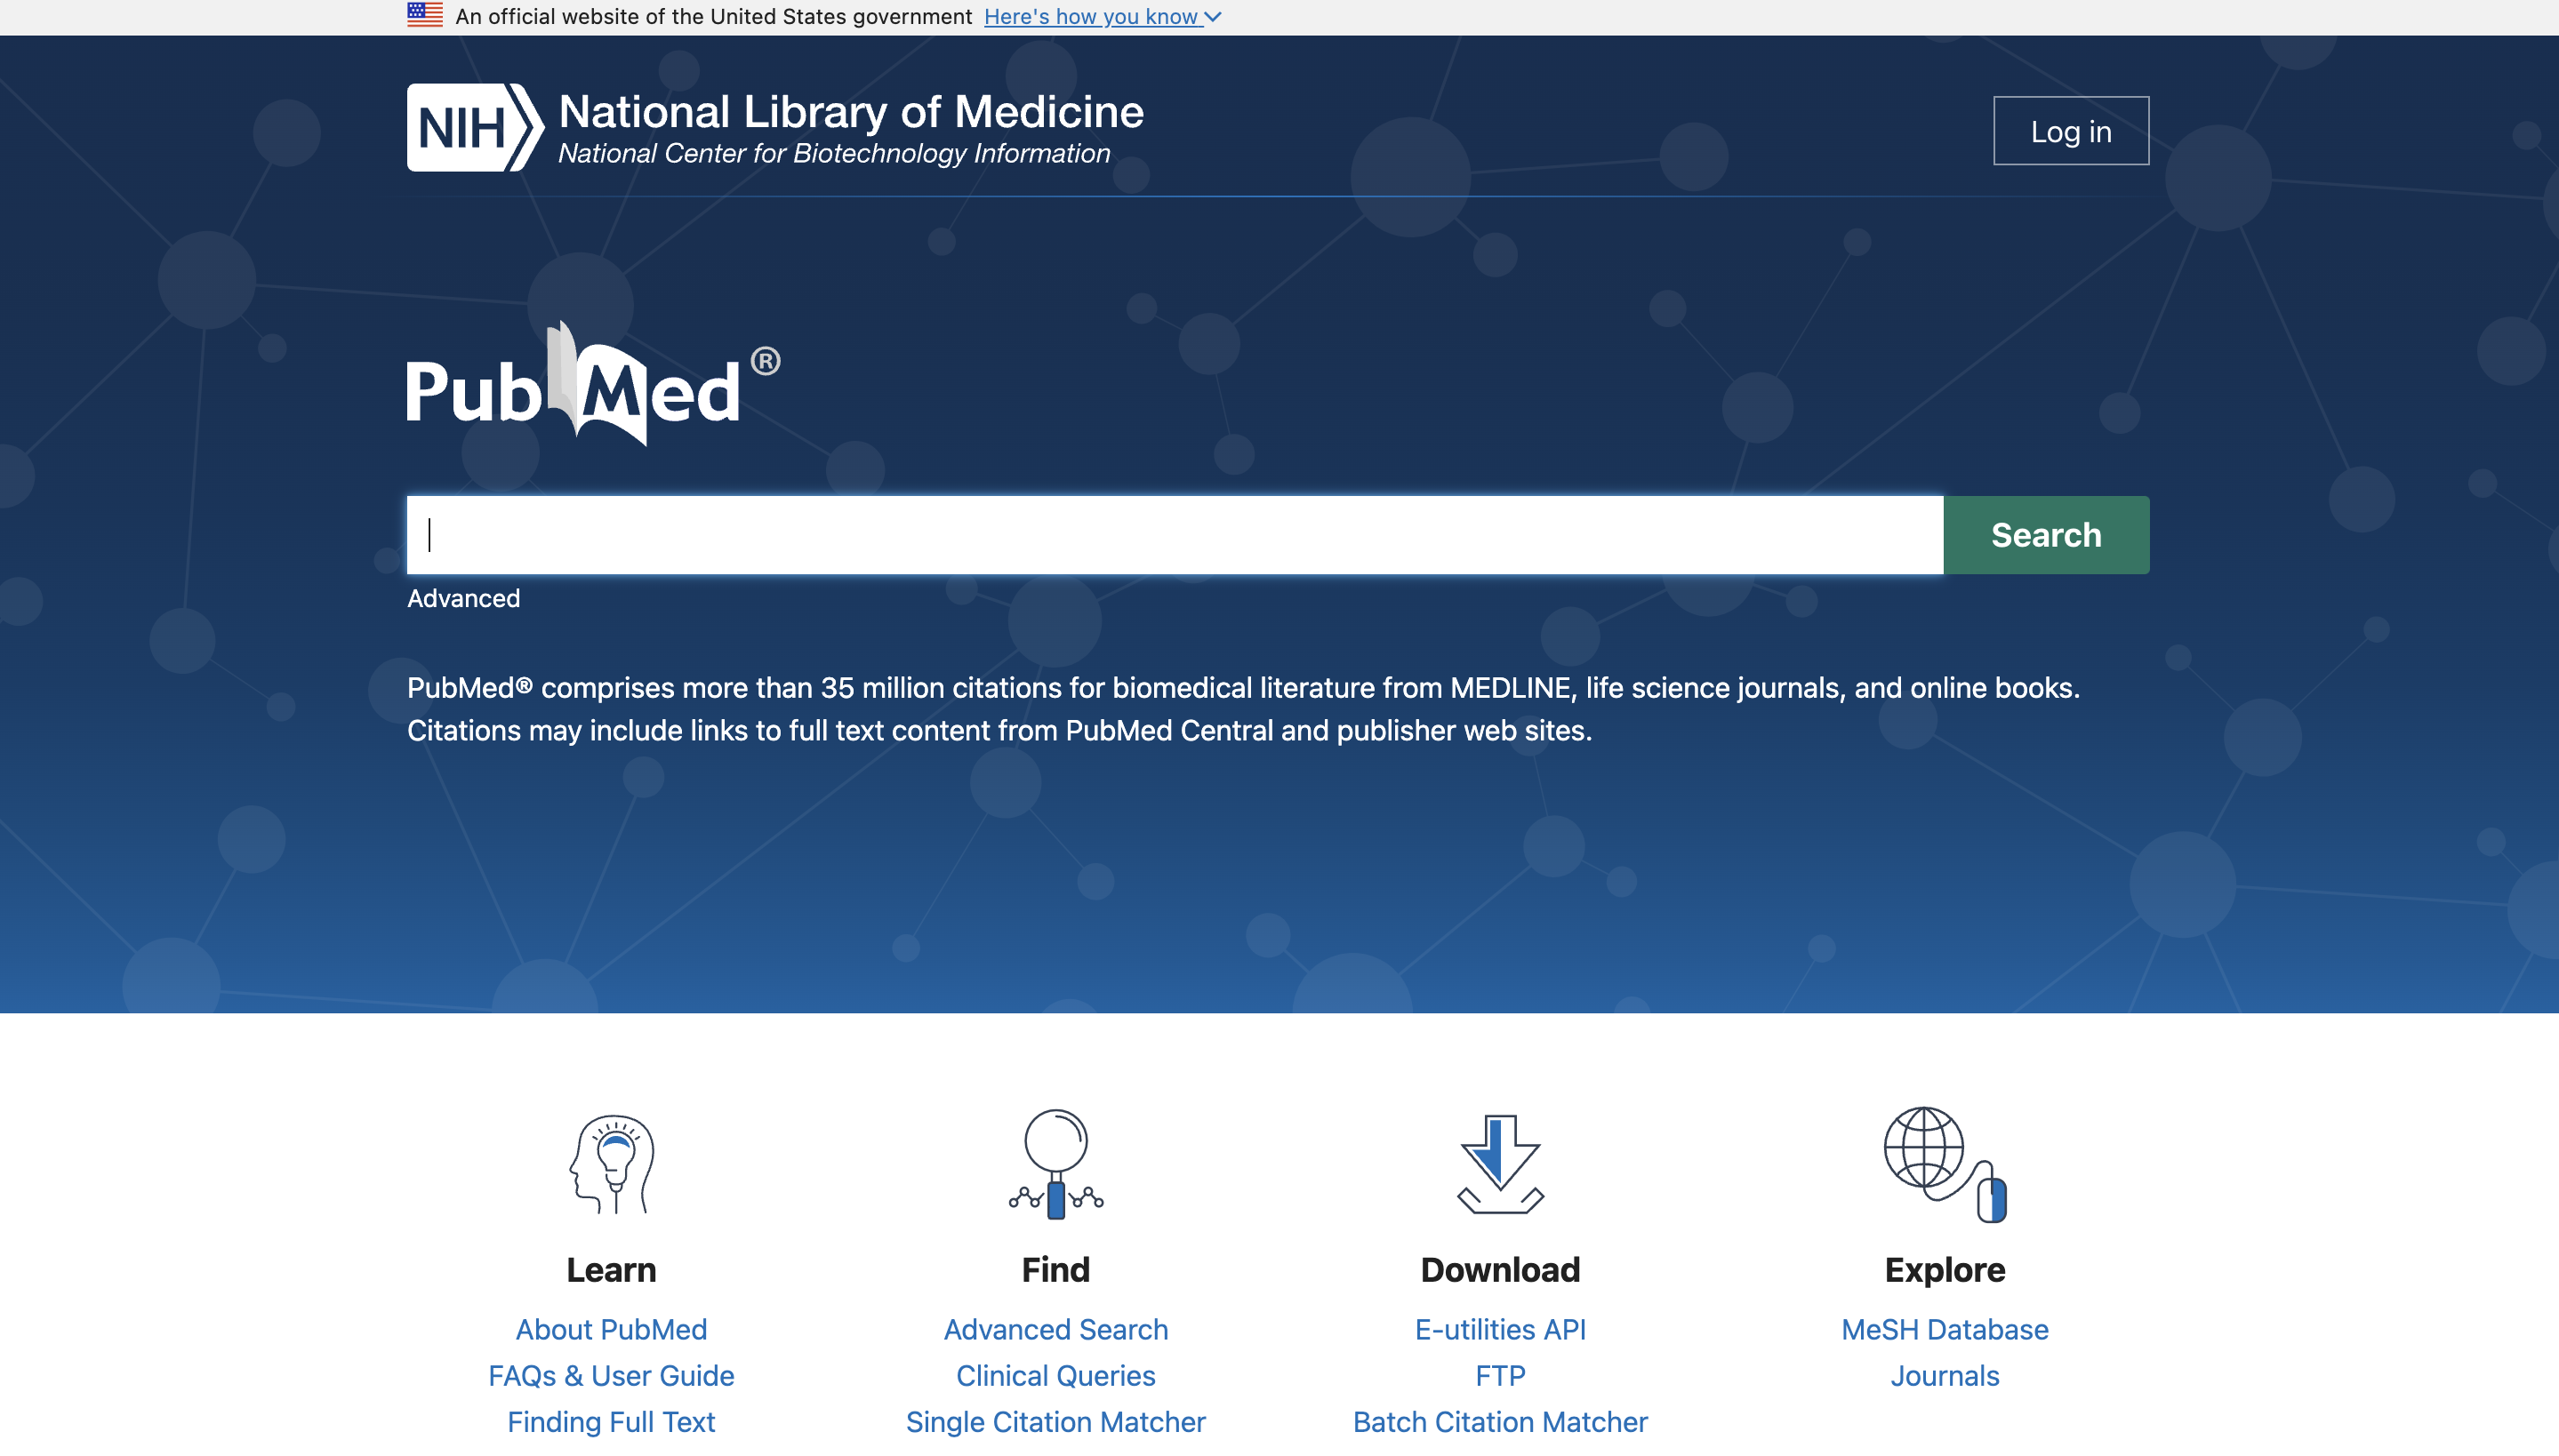

# 📌Problem Statement
The problem at hand is to extract relevant articles on Alzheimer's disease from PubMed. Alzheimer's disease is a complex and debilitating neurodegenerative disease that affects millions of people worldwide. As research into Alzheimer's disease is a rapidly evolving field, it is essential to have access to up-to-date and accurate information.

the extracted information will have

- name of the article

- authors of the article

- citation

- pubmedID (a unique identifier alloted to every article on PubMed)

- link to the article






The first page of the Webpage

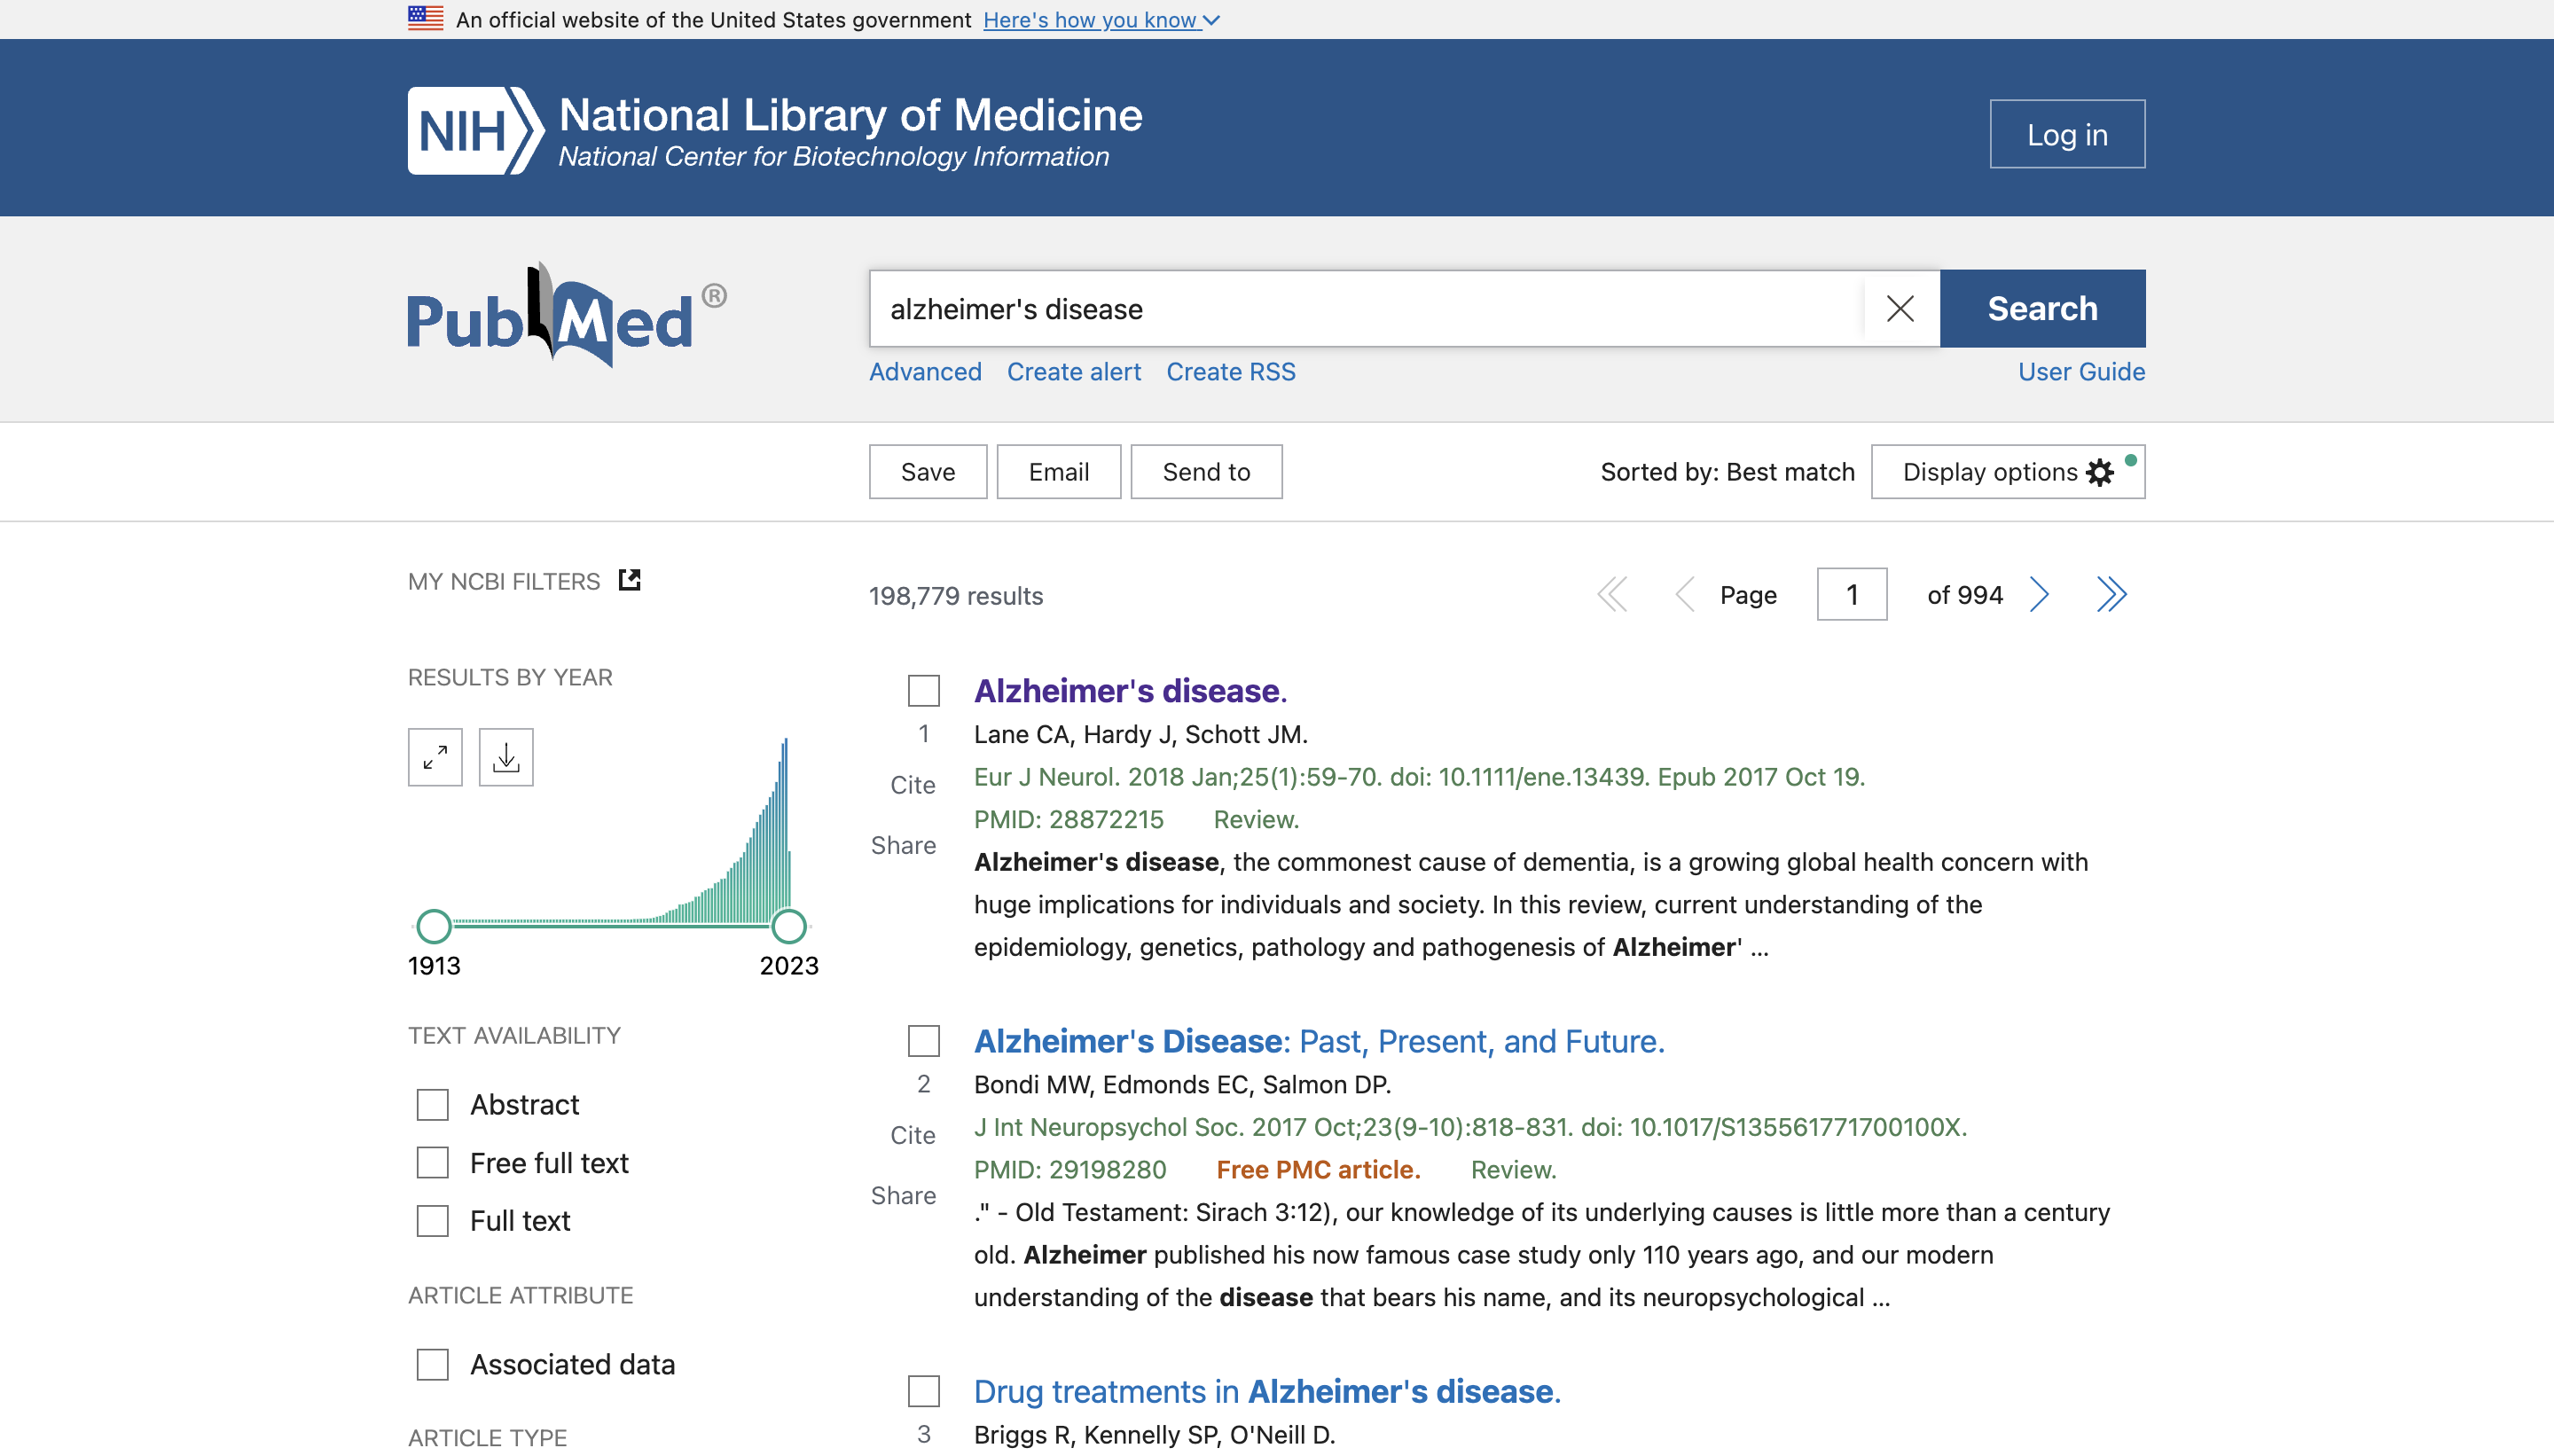

# A break down of the code ⚒
1. Download web pages via requests library and convert it into a BeautifulSoup object
2. Use BeautifulSoup to parse information
3. Create functions to get the necessary tags and write information gathered to a csv

# Libraries used 📚

In [ ]:
#import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
!pip install jovian --upgrade --quiet
import jovian

# Extract URLs to be scraped 👩🏽‍💻
the results are spread over 200 pages, hence, we will have to retireve the URLs of all these pages.

Create a for loop to get a list of the URLs of 10 pages. Each page shows 200 articles.

In [ ]:
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page='

def pubmed_url(url):
  #create a list of URL
  urls = []
  #i taked the value of the page number and gets added to the base URL
  for i in range(11):
    urls.append(base_url+ str(i+1))
    #returns a list of URL within the range
  return urls

URLS = pubmed_url(base_url)
URLS

['https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=1',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=2',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=3',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=4',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=5',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=6',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=7',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=8',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=9',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=10',
 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page=11']

# Get Response from a particular URL using Requests ☑️
requests.get function is used to download the webpage that is loaded as the response object.

status_code is used to check if we were able to download the webpage. here we are checking only for webpage 2

In [ ]:
response = requests.get(pubmed_url(base_url)[2])
print(response.status_code)

200


Since the status_code is 200, the webpage has been downloaded without an error and now the downloaded webpage has been converted into an object using the 'html.parser' arguement.

In [ ]:
response_text = BeautifulSoup(response.text, 'html.parser')

In [ ]:
#getting first 1000 characters of the webpage
response.text[:1000]

'<!DOCTYPE html>\n\n\n\n\n<html lang="en" >\n<head  itemscope itemtype="http://schema.org/WebPage"  prefix="og: http://ogp.me/ns#" >\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <!-- Mobile properties -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  \n  \n  <link rel="preconnect" href="https://cdn.ncbi.nlm.nih.gov">\n  <link rel="preconnect" href="https://www.ncbi.nlm.nih.gov">\n  <link rel="preconnect" href="https://www.google-analytics.com">\n\n  \n  \n    <link rel="stylesheet" href="https://cdn.ncbi.nlm.nih.gov/pubmed/3999abda-1aa9-4f90-8288-2c8a20b4769d/CACHE/css/output.e3e95ed4a5de.css" type="text/css">\n  \n\n  <link rel="stylesheet" href="https://cdn.ncbi.nlm.nih.gov/pubmed/3999abda-1aa9-4f90-8288-2c8a20b4769d/CACHE/css/output.452c70ce66f7.css" type="text/css">\n\n  \n    \n  \n\n  \n    <link re

In [ ]:
#total number of characters in the webpage
len(response.text)

1170743

Here we have created a function that can requests for a url and and downloads it and then converts it into an Object.

In [ ]:
def get_pubmed_url(url):
  response = requests.get(url)

  if response.status_code != 200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ' + url)

  return BeautifulSoup(response.text, 'html.parser')

Response = get_pubmed_url(URLS[2])

Let us work with one web page for now and try to extract all the necessary information

In [ ]:
doc = get_pubmed_url(URLS[2])

# acessing tags 🏃‍♀️
BeautifulSoup allows the user to extract data from HTML files (already downloaded using response.get) To get the information you want, open the inspect table on your browser and navigate.

The preferred language for building web pages is HTML (Hypertext Markup Language). It comprises of a collection of tags that determine the organisation and content of a web page and are surrounded by angle brackets. Here are a few of the most used HTML tags along with what they do:

html: Defines the beginning and end of an HTML document.

head: Contains metadata about the web page, such as the title, author, and description.

body: Contains the visible content of the web page, such as text, images, and multimedia.

h1 to h6: Used to define headings of different sizes.

p: Used to define paragraphs of text.

a: Used to create hyperlinks to other web pages or files.

img: Used to embed images in a web page.

ul and li: Used to create unordered lists.

table, tr, td: Used to create tables and define their rows and columns.

form, input, button: Used to create web forms for user input.

In this project the most common tags that i came across were - div, span and various classes

class - Classes are used to group elements together and apply the same styles to them.
div tag - a block-level element that is used to group other elements together. It is commonly used to create sections of a web page, and to apply styles to groups of elements.
span tag - an inline element that is used to apply styles to a small amount of text or content within a larger element. It is commonly used to highlight or emphasize certain words or phrases within a sentence or paragraph.

# exploring the tags 🕵🏻‍♂️

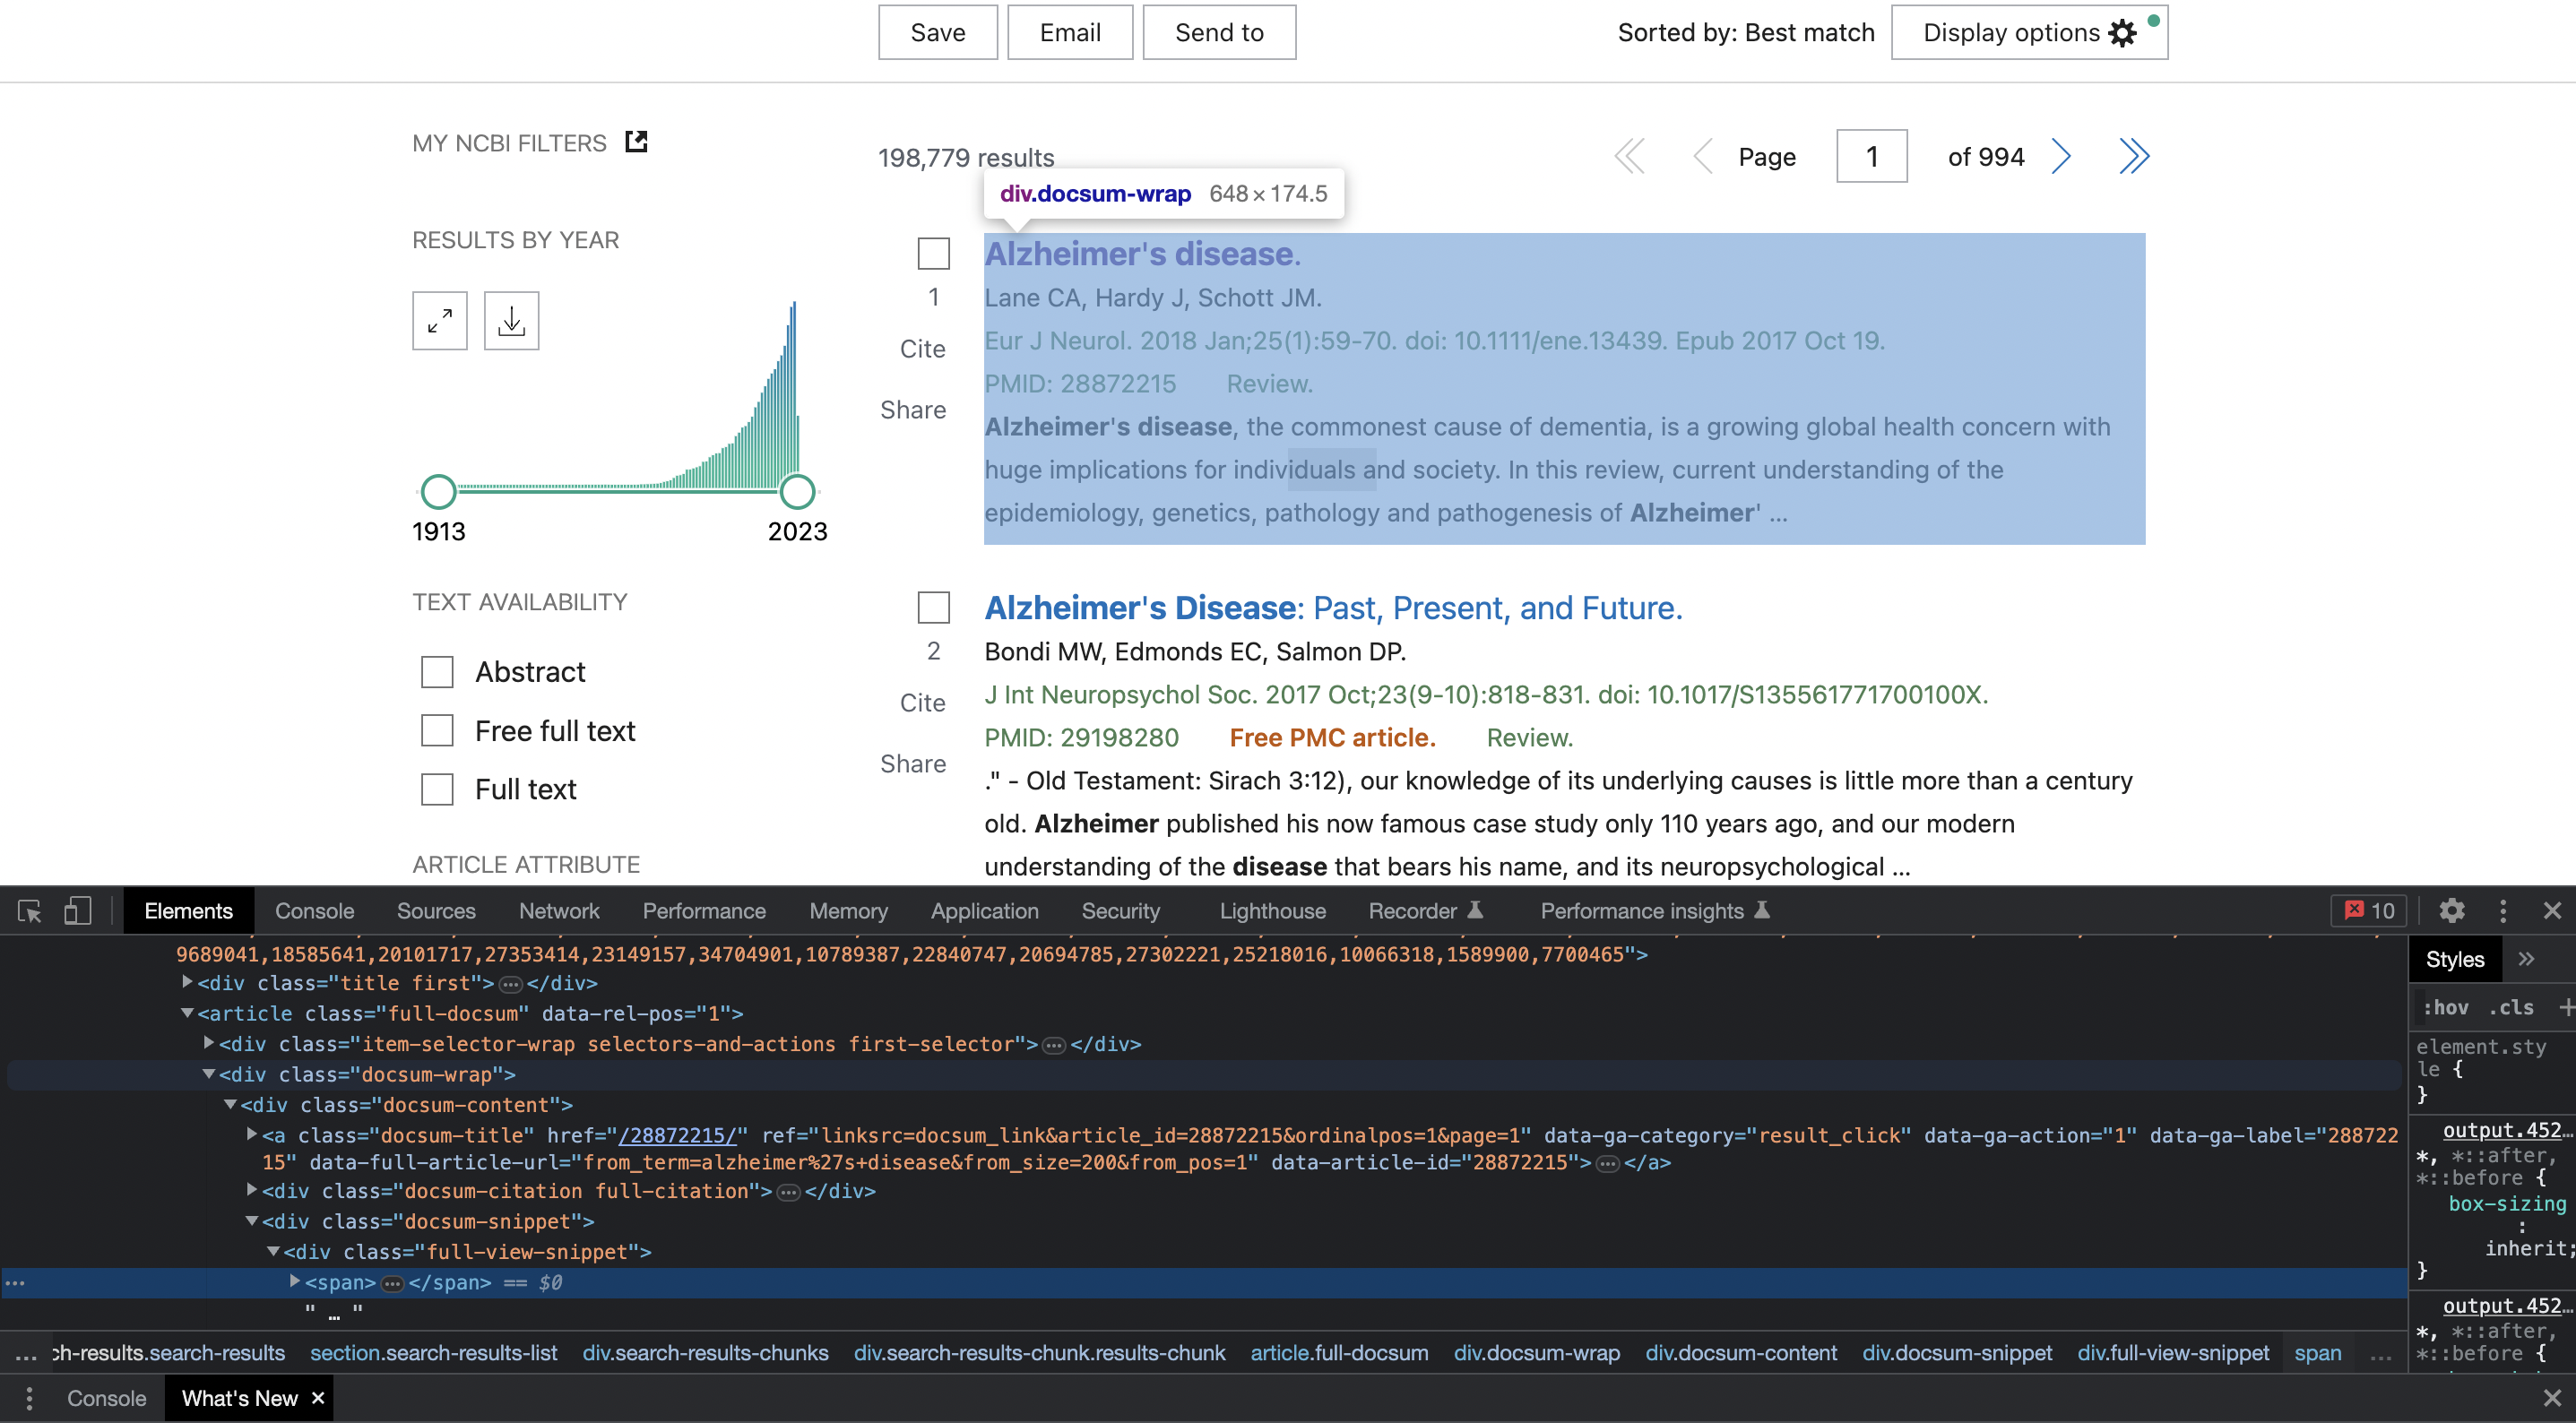

## getting article tags

In [ ]:
selection_class = 'docsum-title'
article_tags = doc.find_all('a', {'class': selection_class})
len(article_tags)

200

In [ ]:
article_tags[:5]

[<a class="docsum-title" data-article-id="6698495" data-full-article-url="from_term=alzheimer%27s+disease+&amp;from_size=200&amp;from_page=3&amp;from_pos=1" data-ga-action="401" data-ga-category="result_click" data-ga-label="6698495" href="/6698495/" ref="linksrc=docsum_link&amp;article_id=6698495&amp;ordinalpos=1&amp;page=3">
 <b>Alzheimer</b>'<b>s</b> <b>disease</b>: challenge to psychiatry.
               
             </a>,
 <a class="docsum-title" data-article-id="3098766" data-full-article-url="from_term=alzheimer%27s+disease+&amp;from_size=200&amp;from_page=3&amp;from_pos=2" data-ga-action="402" data-ga-category="result_click" data-ga-label="3098766" href="/3098766/" ref="linksrc=docsum_link&amp;article_id=3098766&amp;ordinalpos=2&amp;page=3">
 <b>Alzheimer</b>'<b>s</b> <b>disease</b>: an age-old problem.
               
             </a>,
 <a class="docsum-title" data-article-id="3466098" data-full-article-url="from_term=alzheimer%27s+disease+&amp;from_size=200&amp;from_page=3&

## getting author names

In [ ]:
selection_class = 'docsum-authors full-authors'
author_tags = doc.find_all('span', {'class': selection_class})
len(author_tags)

200

In [ ]:
author_tags[:5]

[<span class="docsum-authors full-authors">Folstein M.</span>,
 <span class="docsum-authors full-authors">Rousseau PC.</span>,
 <span class="docsum-authors full-authors">Long D.</span>,
 <span class="docsum-authors full-authors">Wülfert E.</span>,
 <span class="docsum-authors full-authors">Geula C, Efthymiopoulos S, Friedland RP.</span>]

## getting citation tags

In [ ]:
selection_class = 'docsum-journal-citation full-journal-citation'
citation_tags = doc.find_all('span', {'class': selection_class})
len(citation_tags)

200

In [ ]:
citation_tags[:5]

[<span class="docsum-journal-citation full-journal-citation">Hosp Community Psychiatry. 1984 Feb;35(2):111. doi: 10.1176/ps.35.2.111.</span>,
 <span class="docsum-journal-citation full-journal-citation">Hosp Pract (Off Ed). 1987 Jan 15;22(1):163, 166, 168 passim.</span>,
 <span class="docsum-journal-citation full-journal-citation">N Z Nurs J. 1986 Aug;79(8):16-9.</span>,
 <span class="docsum-journal-citation full-journal-citation">J Pharm Belg. 1997 Mar-Apr;52(2):97-8.</span>,
 <span class="docsum-journal-citation full-journal-citation">Amyloid. 2010 Jun;17(2):86-90. doi: 10.3109/13506129.2010.483120.</span>]

## getting pubmed Ids

In [ ]:
selection_class = 'docsum-pmid'
id_tags = doc.find_all('span', {'class': selection_class})
len(id_tags)

200

In [ ]:
id_tags[:5]

[<span class="docsum-pmid">6698495</span>,
 <span class="docsum-pmid">3098766</span>,
 <span class="docsum-pmid">3466098</span>,
 <span class="docsum-pmid">9296959</span>,
 <span class="docsum-pmid">20462368</span>]

## **all of these articles are located in parent tag - 'article' in class 'full-docsum'**

In [ ]:
article_info = doc.find_all('article', class_='full-docsum')
len(article_info)

200

In [ ]:
article_info[:5]

[<article class="full-docsum" data-rel-pos="1">
 <div class="item-selector-wrap selectors-and-actions first-selector">
 <input aria-labelledby="result-selector-label" class="search-result-selector" id="select-6698495" name="search-result-selector-6698495" type="checkbox" value="6698495">
 <label class="search-result-position" for="select-6698495"><span class="position-number">401</span></label>
 <div class="result-actions-bar side-bar">
 <div class="cite">
 <button aria-haspopup="true" class="cite-search-result trigger result-action-trigger citation-dialog-trigger" data-all-citations-url="/6698495/citations/" data-citation-style="nlm" data-ga-action="cite" data-ga-category="save_share" data-ga-label="open" data-pubmed-format-link="/6698495/export/">
       Cite
     </button>
 </div>
 <div class="share">
 <button aria-haspopup="true" class="share-search-result trigger result-action-trigger share-dialog-trigger" data-facebook-url="http://www.facebook.com/sharer/sharer.php?u=https%3A//pu

we have found the tags for the information we need. Now to make it easier to parse pages, we will create functions.

# Creating functions ✍🏽
We make a function that takes all the tags for - titles, authors, citations, citation, PubMed ID, and link

here we will be using the .find() function instead of .find_all() function.

.find() returns the first element that matches the specified tag and attribute. .find_all() returns a list of all the elements that match the specified tag or attribute.

In [ ]:
#a list where data will be stored
articles=[]
def getting_info():
  for tag in article_info[9:]:

    #getting title tags.
    Title = tag.find('a').text.strip()     #use .text to get just the text contained within the tag
                                                #.strip() is used to remove any space

    #getting names of all authors
    Authors = tag.find('span', class_ = 'docsum-authors full-authors').text.strip()


    #getting citations
    Citation =  tag.find('span', class_ = 'docsum-journal-citation full-journal-citation').text.strip()

    #getting PubMed ID
    PubMedId = tag.find('span', class_ = 'docsum-pmid').text.strip()


    #getting link
    Link = tag.find('a')['href']


    article_dict= {'Name_of_title' : Title,
                  'Name_ofAuthors' : Authors,
                  'Cite' :  Citation,
                  'PubMedId' : PubMedId ,
                  'Links': 'https://pubmed.ncbi.nlm.nih.gov' + Link }


    articles.append(article_dict)

getting_info()

In [ ]:
articles[:10]

[{'Name_of_title': "Alzheimer's disease research at Johns Hopkins.",
  'Name_ofAuthors': 'Rovner BW, Folstein MF.',
  'Cite': 'Md Med J. 1990 Apr;39(4):399-402.',
  'PubMedId': '2333027',
  'Links': 'https://pubmed.ncbi.nlm.nih.gov/2333027/'},
 {'Name_of_title': 'Human gut microbiota: the links with dementia development.',
  'Name_ofAuthors': 'Alkasir R, Li J, Li X, Jin M, Zhu B.',
  'Cite': 'Protein Cell. 2017 Feb;8(2):90-102. doi: 10.1007/s13238-016-0338-6. Epub 2016 Nov 19.',
  'PubMedId': '27866330',
  'Links': 'https://pubmed.ncbi.nlm.nih.gov/27866330/'},
 {'Name_of_title': "Selections from current literature: Alzheimer's disease.",
  'Name_ofAuthors': 'Trilling JS.',
  'Cite': 'Fam Pract. 1994 Jun;11(2):216-9. doi: 10.1093/fampra/11.2.216.',
  'PubMedId': '7958589',
  'Links': 'https://pubmed.ncbi.nlm.nih.gov/7958589/'},
 {'Name_of_title': "[Clinical aspects and course of Alzheimer's disease].",
  'Name_ofAuthors': 'Poncet M, Guinot H.',
  'Cite': 'Rev Prat. 1989 Feb 23;39(6):462

lets write a function that extract each information for each 'article_info' on a page.

In [ ]:
def scrapping_pubmed(doc):  #find the tag that defines an article and find the matching tags using the above function

  find_tag = doc.find_all('article', class_='full-docsum')

In [ ]:
def getting_info(doc):
    find_tag = doc.find_all('article', class_='full-docsum')[10]


    Title = find_tag.find('a').text.strip()
    Authors = find_tag.find('span', class_ = 'docsum-authors full-authors').text.strip()
    Citation =  find_tag.find('span', class_ = 'docsum-journal-citation full-journal-citation').text.strip()
    PubMedId = find_tag.find('span', class_ = 'docsum-pmid').text.strip()
    Link = find_tag.find('a')['href']

  # create a dictionary for the extracted information
    dict= {'Name_of_title' : Title,
                    'Name_ofAuthors' : Authors,
                    'Cite' :  Citation,
                    'PubMedId' : PubMedId ,
                    'Links': 'https://pubmed.ncbi.nlm.nih.gov' + Link }
    print(dict)
    return(dict)




getting_info(get_pubmed_url(URLS[2]))

{'Name_of_title': 'Human gut microbiota: the links with dementia development.', 'Name_ofAuthors': 'Alkasir R, Li J, Li X, Jin M, Zhu B.', 'Cite': 'Protein Cell. 2017 Feb;8(2):90-102. doi: 10.1007/s13238-016-0338-6. Epub 2016 Nov 19.', 'PubMedId': '27866330', 'Links': 'https://pubmed.ncbi.nlm.nih.gov/27866330/'}


{'Name_of_title': 'Human gut microbiota: the links with dementia development.',
 'Name_ofAuthors': 'Alkasir R, Li J, Li X, Jin M, Zhu B.',
 'Cite': 'Protein Cell. 2017 Feb;8(2):90-102. doi: 10.1007/s13238-016-0338-6. Epub 2016 Nov 19.',
 'PubMedId': '27866330',
 'Links': 'https://pubmed.ncbi.nlm.nih.gov/27866330/'}

## defining a function to write all information to a csv file

In [ ]:
def get_csv(items,path):
  with open(path, 'w') as f:   #open a file that you can write on

    if len(items) == 0:
      return
    #define and write headers for the csv
    headers =list(items[0].keys())
    f.write(','.join(headers) + '\n')

    #loop for all items in a dictionary
    for item in items:
      values = []
      for header in headers:
        values.append(str(item.get(headder, '')))

      f.write(',', join(values) + "\n")

# The Only Function We need 🎉
Now that we have created various functions and loops, lets combine them to get a function that loops over 11 pages and extracts information and writes all the information to a csv file

In [ ]:
def pubmed_url(base_url):
  #create a list of URL
  urls = []
  #i taked the value of the page number and gets added to the base URL
  for i in range(11):
    urls.append(base_url+ str(i+1))
    #returns a list of URL within the range
  return urls

def get_pubmed_url(url):     # get response from url, else raise an exception if response fails.
  response = requests.get(url)

  if response.status_code != 200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ' + url) #if response is recieved, pass the response.text through 'html.parser'

  return BeautifulSoup(response.text, 'html.parser')

def getting_info(tag):  #get the information asked for and parse it into a dictionary

    Title = tag.find('a').text.strip()
    Authors = tag.find('span', class_ = 'docsum-authors full-authors').text.strip()
    Citation =  tag.find('span', class_ = 'docsum-journal-citation full-journal-citation').text.strip()
    PubMedId = tag.find('span', class_ = 'docsum-pmid').text.strip()
    Link = tag.find('a')['href']


    return{'Name_of_title' : Title,
                  'Name_ofAuthors' : Authors,
                  'Cite' :  Citation,
                  'PubMedId' : PubMedId ,
                  'Links': 'https://pubmed.ncbi.nlm.nih.gov' + Link }

def scrapping_pubmed(doc):  #find the tag that defines an article and find the matching tags using the above function

  find_tag = doc.find_all('article', class_='full-docsum')

#parsing tags to dictionary
  results = [getting_info(tag) for tag in find_tag]
  return results


def get_csv(items,path): # function to write information to a csb
  #names for headers
  a = items[0].keys()
  print(a)

  #write information to a new file
  with open(path, 'w', newline= '', encoding ='utf-8')  as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=a)
    dict_writer.writeheader()
    #for a row in items
    dict_writer.writerows(items)

def flatten(t):
    return [item for sublist in t for item in sublist]


def Parser(base_url, path):
#final function

#list that stores all the data
  an_article = []

#get urls using the pubmed_url() function
  urls= pubmed_url(base_url)

#looping over the list of urls
  for i in urls:

#request for url, download it, get the tags
    an_article.extend(scrapping_pubmed(get_pubmed_url(i)))

#write information to csv
  get_csv(an_article,path)
  print(f'Total number of articles scraped:{len(an_article)}')
  return an_article


In [ ]:
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=alzheimer%27s%20disease%20&size=200&page='
an_article = Parser(base_url, 'Alzheimers_disease_articles.csv')

dict_keys(['Name_of_title', 'Name_ofAuthors', 'Cite', 'PubMedId', 'Links'])
Total number of articles scraped:2200


In [ ]:
df = pd.read_csv('Alzheimers_disease_articles.csv')
df.head()

,Name_of_title,Name_ofAuthors,Cite,PubMedId,Links
0,Alzheimer's disease.,"Lane CA, Hardy J, Schott JM.",Eur J Neurol. 2018 Jan;25(1):59-70. doi: 10.11...,28872215,https://pubmed.ncbi.nlm.nih.gov/28872215/
1,New insights into atypical Alzheimer's disease...,"Graff-Radford J, Yong KXX, Apostolova LG, Bouw...",Lancet Neurol. 2021 Mar;20(3):222-234. doi: 10...,33609479,https://pubmed.ncbi.nlm.nih.gov/33609479/
2,Drug treatments in Alzheimer's disease.,"Briggs R, Kennelly SP, O'Neill D.",Clin Med (Lond). 2016 Jun;16(3):247-53. doi: 1...,27251914,https://pubmed.ncbi.nlm.nih.gov/27251914/
3,Molecular mechanisms of neuropathological chan...,"Serý O, Povová J, Míšek I, Pešák L, Janout V.",Folia Neuropathol. 2013;51(1):1-9. doi: 10.511...,23553131,https://pubmed.ncbi.nlm.nih.gov/23553131/
4,Biomarkers for Alzheimer's Disease Diagnosis.,"Mantzavinos V, Alexiou A.",Curr Alzheimer Res. 2017;14(11):1149-1154. doi...,28164766,https://pubmed.ncbi.nlm.nih.gov/28164766/


In [ ]:
df.tail()

,Name_of_title,Name_ofAuthors,Cite,PubMedId,Links
2195,Perspectives on the etiology of Alzheimer's di...,"Mozar HN, Bal DG, Howard JT.",JAMA. 1987 Mar 20;257(11):1503-7.,2950247,https://pubmed.ncbi.nlm.nih.gov/2950247/
2196,[Design of clinical trials for patients with A...,"Matías-Guiu J, Galiano L, Pastor I.",Rev Neurol. 1995 Jan-Feb;23(119):108-10.,8548602,https://pubmed.ncbi.nlm.nih.gov/8548602/
2197,Genetic factors in the genesis of Alzheimer's ...,St George-Hyslop PH.,Ann N Y Acad Sci. 2000;924:1-7. doi: 10.1111/j...,11193785,https://pubmed.ncbi.nlm.nih.gov/11193785/
2198,Alzheimer's disease: a re-examination of the a...,"Neve RL, Robakis NK.",Trends Neurosci. 1998 Jan;21(1):15-9. doi: 10....,9464679,https://pubmed.ncbi.nlm.nih.gov/9464679/
2199,Nanoscale Imaging Reveals Big Role for Iron in...,"Ayton S, James SA, Bush AI.",Cell Chem Biol. 2017 Oct 19;24(10):1192-1194. ...,29053948,https://pubmed.ncbi.nlm.nih.gov/29053948/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name_of_title   2200 non-null   object
 1   Name_ofAuthors  2200 non-null   object
 2   Cite            2200 non-null   object
 3   PubMedId        2200 non-null   int64 
 4   Links           2200 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB


In [ ]:
df.shape

(2200, 5)

# what next? 🧐
although APIs of biological databases work perfectly fine, it would be interesting to make a function, that acceses the Internal links of each article - like FASTA sequence(sequence of protein or DNA or RNA if availble), or the cross links to other articles
this project was used as a part of my academic project in Biological Databases, where I made an Excel database for LncRNAs linked to Neurological Disorders, alzheimer's disease was one of them.

# Let's Summarise 🔗
In this project, I scrapped 2200 research articles from PubMed. The extracted data has the title for the article, the authors, the citation,the PubMed ID and Links to each article.
The csv contains 2200 rows and 5 columns
**libraries used**
- BeautifulSoup4
- Pandas
- Requests

**I used the following functions**

- *pubmed_url()* : to get the pubmed URLs for 11 pages

- *getting_info()* : extracting all articles - article, authors, citations, pubmed ids and links

- *scrapping_pubmed()*: find the tag that  
defines an article and find the matching
tags using the above function

- *get_csv(items,path)* - generate csv of dataframe

- *Parser(base_url, path)* :final function that gets the necessary tags from all the URLs

# References
- https://pubmed.ncbi.nlm.nih.gov
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.geeksforgeeks.org

